# Last Time:  Wrangling and Data Preparation

* Get familiar with data: correlation, visualization, groupby
* Data Cleaning: null value replacement, nominal->numeric conversion, (dropping values)
* Feature Selection: selecting attributes, (creating attributes)
* Scikit-Learn
  * Logistic Regression
  * Decision Tree
* Submit to Kaggle

# Prior to That:
* Virtualenv, python packages/requirements.txt, Jupyter Notebook, git, PS shell scripts, (Microsoft VS-Code)



# Today: Decision Trees

I am following "Machine Learning" (Tom M. Mitchell)

* http://www.cs.cmu.edu/~tom/mlbook.html
* https://www.amazon.com/Learning-McGraw-Hill-International-Editions-Computer/dp/0071154671/ref=sr_1_3?keywords=machine+learning+mitchell&qid=1566387805&s=gateway&sr=8-3

"Decision Tree Learning" (Chapter 3)

And content from scikit-learn.org
* https://scikit-learn.org/stable/modules/tree.html


# Introduction
* Method for learning discrete-valued target
* Discrete-valued attributes used directly, numeric are converted 
* DTs are widely used and practical


### Ross Quinlan

* ID3 (1986)
* C4.5  (J4.8 is open source Java-based implementation used in WEKA)
* C5.0

https://www.rulequest.com/Personal/
    

## Representation
* Each node tests an attribute, each branch is a value of the attribute
* Classification starts at root, test at each level.
* Leaf assigns the result.
* Tree can be represented as set of if-then-rules
    
  <diagram>
    
    

### Example: Decision Tree for concept *Play Tennis* (adapted from the 1986 paper)


* Attributes:
 * Outlook [Sunny, Overcast, Rain]
 * Humidity [High Normal]
 * Wind [Strong, Weak]
* Class:
 * Play Tennis [Yes, No]

![alt text](images/mitchell_3_1.png "Play Tennis")

#### Outlook=Sunny, Temperature=Hot, Humidity=High, Wind=Strong
#####    ==>    Play Tennis = No

 #### Can be expressed as a *Disjunction of Conjunction*
    Play Tennis = 
    
    (Outlook = Sunny ^ Humidity = Normal) v
    
    (Outlook = Overcast) v
    
    (Outlook = Rain ^ Wind = Weak)

# ---------------------------------

# Learning Algorithm
1. Choose attribute to be tested at the root of the tree
2. Descendent nodes created for each value of the attribute
3. Repeat

*Top-down greedy search with no backtracking*


### Pseudocode
![alt text](images/mitchell_table_3_1.png)

# Outline
* Which Attribute is the Best Classifier?
* Overfitting / Tree Depth / Pruning
* Numeric Attributes...
* Attributes with Differing Costs


## Entropy and Information Gain

Entropy is a measure of homogenity of categorical data

https://en.wikipedia.org/wiki/Entropy_(information_theory)


In [2]:
import numpy as np
from scipy.stats import entropy

# eight possible values - no homogeniety (completely diverse)
labels = [1,2,3,4,5,6,7,8, 1,2,3,4,5,6,7,8, 1,2,3,4,5,6,7,8]
value,counts = np.unique(labels, return_counts=True)
print(entropy(counts, base=2))

# eight possible values - some homogeniety
labels = [1,2,3,4,5,6,7,8, 1,1,1,1,1,1,1,1, 1,1,1,1,1,1,1,1]
value,counts = np.unique(labels, return_counts=True)
print(entropy(counts, base=2))



3.0
1.689676321502166


### Review: 
Log2(value) is the number of bits required to encode using base-2 encoding

* Log2(16) = 4

* Log2(8) = 3

* Log2(4) = 2

* Log2(2) = 1

* Log2(1) = ?

* Log2(0.9) = ?



In [3]:
print(np.log2(16))
print(np.log2(8))
print(np.log2(4))
print(np.log2(2))
print(np.log2(1))
print(np.log2(0.9))


4.0
3.0
2.0
1.0
0.0
-0.15200309344504995


### Entropy

![alt text](images/mitchell_3_3.png "Entropy")


Entropy is the sum of the number of bits needed to encode each value the variable can take, weighted by the frequency of that value.



In [4]:
h = (17/24) * np.log2(17/24) + 7 * (1/24) * np.log2(1/24)
print(h)

-1.6896763215021655


# Q: Which attribute should be tested at the root of the tree?
## A: The one that provides the greatest reduction in entropy


### Information Gain
Information Gain is the reduction in entropy caused by partitioning the examples according to an attribute A


![alt text](images/mitchell_3_4.png "Information Gain")

where
* S = collection of examples
* A = an attribute
* Sv = subset of S for which attribute A has value v

### Note:
* The first term is entropy of the original collection S

* The second term is expected value of entropy after S is partitioned using attribute A

* The second term is the sum of entropies of each subset Sv weighted by the fraction of examples that belong to Sv





# ---------------------------------

# Outline
* ~~Which Attribute is the Best Classifier?~~
* Overfitting / Tree Depth / Pruning
* Numeric Attributes...
* Attributes with Differing Costs
    

# ---------------------------------

## Overfitting
The ID3 Algorithm generates branches until the training data is perfectly predicted.

This can lead to overfitting becuase too few training examples at the leaf nodes (not representative and/or subject to noise)

### ID3 Medical Patient / Diabetes Dataset

![alt text](images/mitchell_figure_3_6.png "Overfitting")

Approaches to stopping:
* Stop early (before reaching perfect classification)
* Post-pruning

Criterion for final tree size:
    
* Use separate examples (validation data / "Reduced Error Pruning - Quinlan 1987)"
* Use all data, but evaluate specific node using statistical test (similar to "Bootstrap"?)
* Explicit Measure of complexity (regularization)

### ID3 Medical Patient / Diabetes Dataset

![alt text](images/mitchell_figure_3_7.png "Overfitting")

# ---------------------------------

# Outline
* ~~Which Attribute is the Best Classifier?~~
* ~~Overfitting / Tree Depth / Pruning~~
* Numeric Attributes...
* Attributes with Differing Costs

# ---------------------------------

## Numeric Attributes


### Example:
* Sort by value
* Identify change in target class (thresholds)
* Evaluate using information gain for each
* Establish nominal attribute using threshold to create categories

Several references in text

![alt text](images/mitchell_page72.png "Numeric Attribute")

# Scikit
### *DecisionTreeClassifier* is a class capable of performing multi-class classification on a dataset.


In [8]:
from sklearn import tree
X = [[0, 0], [1, 1], [2,0]] # [["red", "round"], ["yellow", "long"], ["orange", "round"]]
Y = [0, 1, 2]               # [    "apple",            "banana",            "orange"]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

In [9]:
clf.predict([[0,0],[1, 1],[2,0]])

array([0, 1, 2])

In [10]:
import graphviz

[Text(133.92000000000002, 181.2, 'X[0] <= 0.5\ngini = 0.667\nsamples = 3\nvalue = [1, 1, 1]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(200.88000000000002, 108.72, 'X[1] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]')]

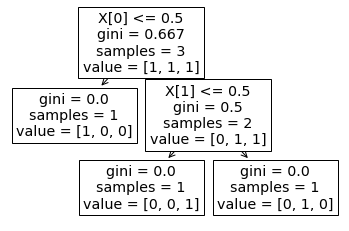

In [11]:
tree.plot_tree(clf)

In [12]:
# sklearn gymnastics for categorical data
# see https://stackoverflow.com/questions/38108832/passing-categorical-data-to-sklearn-decision-tree
# good video https://www.youtube.com/watch?v=0s_1IsROgDc
    
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier

data = pd.DataFrame(np.array([['red', 'round', 'apple'],
                              ['yellow', 'long', 'banana'],
                              ['orange', 'round', 'orange']]),
             columns=['Color', 'Shape', 'Type'])
data

,Color,Shape,Type
0,red,round,apple
1,yellow,long,banana
2,orange,round,orange


In [13]:
data_X = data[['Color', 'Shape']]
data_Y = data[['Type']]
data_one_hot_X = pd.get_dummies(data_X, columns=['Color', 'Shape'], drop_first=True)
data_one_hot_Y = pd.get_dummies(data_Y, columns=['Type'], drop_first=True)

In [14]:
data_one_hot_X

,Color_red,Color_yellow,Shape_round
0,1,0,1
1,0,1,0
2,0,0,1


In [15]:
data_one_hot_Y

,Type_banana,Type_orange
0,0,0
1,1,0
2,0,1


In [16]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(data_one_hot_X, data_one_hot_Y)

[Text(133.92000000000002, 181.2, 'X[2] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [[2, 1]\n[2, 1]]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 1\nvalue = [[0, 1]\n[1, 0]]'),
 Text(200.88000000000002, 108.72, 'X[0] <= 0.5\ngini = 0.25\nsamples = 2\nvalue = [[2, 0]\n[1, 1]]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 1\nvalue = [[1, 0]\n[0, 1]]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.0\nsamples = 1\nvalue = [[1, 0]\n[1, 0]]')]

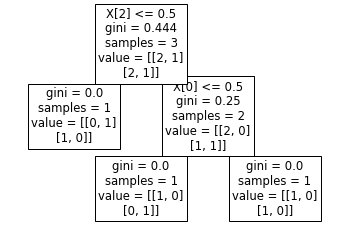

In [17]:
import graphviz 
tree.plot_tree(clf)

In [18]:
clf.predict([[1,0,1],[0, 1, 0],[0, 0, 1]])
#clf.predict([[0,0],[1, 1],[2,3]])


array([[0, 0],
       [1, 0],
       [0, 1]], dtype=uint8)

In [19]:
import pandas as pd
d = pd.DataFrame(np.array([
    ["Sunny",    "Hot",  "High",   "Weak",   "No" ],
    ["Sunny",    "Hot",  "High",   "Strong", "No" ],
    ["Overcast", "Hot",  "High",   "Weak",   "Yes"],
    ["Rain",     "Mild", "High",   "Weak",   "Yes"],
    ["Rain",     "Cool", "Normal", "Weak",   "Yes"],
    ["Rain",     "Cool", "Normal", "Strong", "No" ],
    ["Overcast", "Cool", "Normal", "Strong", "Yes"],
    ["Sunny",    "Mild", "High",   "Weak",   "No" ],
    ["Sunny",    "Cool", "Normal", "Weak",   "Yes"],
    ["Rain",     "Mild", "Normal", "Weak",   "Yes"],
    ["Sunny",    "Mild", "Normal", "Strong", "Yes"],
    ["Overcast", "Mild", "High",   "Strong", "Yes"],
    ["Overcast", "Hot",  "Normal", "Weak",   "Yes"],
    ["Rain",     "Mild", "High",   "Strong", "No" ]]),
             columns=['Outlook', 'Temperature', 'Humidity', 'Wind', 'PlayTennis'])

d

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [20]:
X = d[["Outlook", "Temperature", "Humidity", "Wind"]]
Y = d[["PlayTennis"]]
oh_X = pd.get_dummies(X, columns=["Outlook", "Temperature", "Humidity", "Wind"], drop_first=True)
oh_Y = pd.get_dummies(Y, columns=["PlayTennis"], drop_first=True)

In [21]:
oh_X

,Outlook_Rain,Outlook_Sunny,Temperature_Hot,Temperature_Mild,Humidity_Normal,Wind_Weak
0,0,1,1,0,0,1
1,0,1,1,0,0,0
2,0,0,1,0,0,1
3,1,0,0,1,0,1
4,1,0,0,0,1,1
5,1,0,0,0,1,0
6,0,0,0,0,1,0
7,0,1,0,1,0,1
8,0,1,0,0,1,1
9,1,0,0,1,1,1


In [22]:
oh_Y

,PlayTennis_Yes
0,0
1,0
2,1
3,1
4,1
5,0
6,1
7,0
8,1
9,1


In [23]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(oh_X, oh_Y)

[Text(200.88000000000002, 195.696, 'X[4] <= 0.5\ngini = 0.459\nsamples = 14\nvalue = [5, 9]'),
 Text(133.92000000000002, 152.208, 'X[1] <= 0.5\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(100.44000000000001, 108.72, 'X[5] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(66.96000000000001, 65.232, 'X[0] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(33.480000000000004, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(100.44000000000001, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(133.92000000000002, 65.232, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(167.40000000000003, 108.72, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(267.84000000000003, 152.208, 'X[5] <= 0.5\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(234.36, 108.72, 'X[0] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(200.88000000000002, 65.232, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(267.84000000000003, 65.232, 'gini = 0.0\nsamples = 1\nvalu

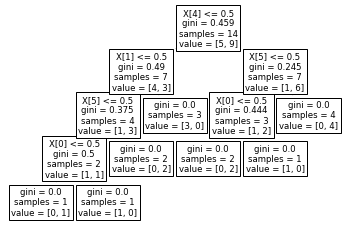

In [24]:
import graphviz 
tree.plot_tree(clf)

In [25]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

In [26]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [27]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

[Text(167.4, 199.32, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.5230

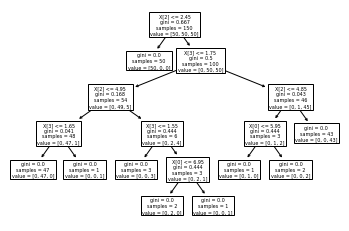

In [28]:
tree.plot_tree(clf.fit(iris.data, iris.target)) 

# -------------------------------------------------------------------------

# The above is not satisfying:

Nominal values need to be converted into one-hot


It is our responsibility to map to one-hot
It is our responsibilty to map back from one-hot
(x[4] < 0.5 is meaningless)


Tree is binary - not the n-branch tree we expected
Attribute labels are gone - "0" and "1" for all attriutes, and many attributes
One value missing from each attribute

No visibility or access into the structure of the tree

Cannot(?) generate Disjunction of Conjunction (or can we?)


Use of the model...
Can we display in a graphical manner ?
Yes but...



We have no visibility/control over the internals
cannot modify the creation, pruning or other parameters



How is the model represe
Can we export/extract to if/then

decision tree is a a set of binary decisions
can you orked like crap

# Options:
Write our own ID3 from the Pseudocode above

Dig further into switches/internals of Scikit: 

* https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

* https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py
        

In [7]:
"""
=========================================
Understanding the decision tree structure
=========================================

The decision tree structure can be analysed to gain further insight on the
relation between the features and the target to predict. In this example, we
show how to retrieve:

- the binary tree structure;
- the depth of each node and whether or not it's a leaf;
- the nodes that were reached by a sample using the ``decision_path`` method;
- the leaf that was reached by a sample using the apply method;
- the rules that were used to predict a sample;
- the decision path shared by a group of samples.

"""
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

estimator = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
estimator.fit(X_train, y_train)

# The decision estimator has an attribute called tree_  which stores the entire
# tree structure and allows access to low level attributes. The binary tree
# tree_ is represented as a number of parallel arrays. The i-th element of each
# array holds information about the node `i`. Node 0 is the tree's root. NOTE:
# Some of the arrays only apply to either leaves or split nodes, resp. In this
# case the values of nodes of the other type are arbitrary!
#
# Among those arrays, we have:
#   - left_child, id of the left child of the node
#   - right_child, id of the right child of the node
#   - feature, feature used for splitting the node
#   - threshold, threshold value at the node
#

# Using those arrays, we can parse the tree structure:

n_nodes = estimator.tree_.node_count
children_left = estimator.tree_.children_left
children_right = estimator.tree_.children_right
feature = estimator.tree_.feature
threshold = estimator.tree_.threshold

print("n_nodes{}".format(n_nodes))
print("children_left{}".format(children_left))
print("children_right{}".format(children_right))
print("feature{}".format(feature))
print("threshold{}".format(threshold))

# The tree structure can be traversed to compute various properties such
# as the depth of each node and whether or not it is a leaf.
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]  # seed is the root node id and its parent depth
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    # If we have a test node
    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True

print("The binary tree structure has %s nodes and has "
      "the following tree structure:"
      % n_nodes)
for i in range(n_nodes):
    if is_leaves[i]:
        print("%snode=%s leaf node." % (node_depth[i] * "\t", i))
    else:
        print("%snode=%s test node: go to node %s if X[:, %s] <= %s else to "
              "node %s."
              % (node_depth[i] * "\t",
                 i,
                 children_left[i],
                 feature[i],
                 threshold[i],
                 children_right[i],
                 ))
print()

# First let's retrieve the decision path of each sample. The decision_path
# method allows to retrieve the node indicator functions. A non zero element of
# indicator matrix at the position (i, j) indicates that the sample i goes
# through the node j.

node_indicator = estimator.decision_path(X_test)

# Similarly, we can also have the leaves ids reached by each sample.

leave_id = estimator.apply(X_test)

# Now, it's possible to get the tests that were used to predict a sample or
# a group of samples. First, let's make it for the sample.

sample_id = 0
node_index = node_indicator.indices[node_indicator.indptr[sample_id]:
                                    node_indicator.indptr[sample_id + 1]]

print('Rules used to predict sample %s: ' % sample_id)
for node_id in node_index:
    if leave_id[sample_id] == node_id:
        continue

    if (X_test[sample_id, feature[node_id]] <= threshold[node_id]):
        threshold_sign = "<="
    else:
        threshold_sign = ">"

    print("decision id node %s : (X_test[%s, %s] (= %s) %s %s)"
          % (node_id,
             sample_id,
             feature[node_id],
             X_test[sample_id, feature[node_id]],
             threshold_sign,
             threshold[node_id]))

# For a group of samples, we have the following common node.
sample_ids = [0, 1]
common_nodes = (node_indicator.toarray()[sample_ids].sum(axis=0) ==
                len(sample_ids))

common_node_id = np.arange(n_nodes)[common_nodes]

print("\nThe following samples %s share the node %s in the tree"
      % (sample_ids, common_node_id))
print("It is %s %% of all nodes." % (100 * len(common_node_id) / n_nodes,))


n_nodes5
children_left[ 1 -1  3 -1 -1]
children_right[ 2 -1  4 -1 -1]
feature[ 3 -2  2 -2 -2]
threshold[ 0.80000001 -2.          4.95000005 -2.         -2.        ]
The binary tree structure has 5 nodes and has the following tree structure:
node=0 test node: go to node 1 if X[:, 3] <= 0.800000011920929 else to node 2.
	node=1 leaf node.
	node=2 test node: go to node 3 if X[:, 2] <= 4.950000047683716 else to node 4.
		node=3 leaf node.
		node=4 leaf node.

Rules used to predict sample 0: 
decision id node 0 : (X_test[0, 3] (= 2.4) > 0.800000011920929)
decision id node 2 : (X_test[0, 2] (= 5.1) > 4.950000047683716)

The following samples [0, 1] share the node [0 2] in the tree
It is 40.0 % of all nodes.


In [ ]:
n_nodes = estimator.tree_.node_count
children_left = estimator.tree_.children_left
children_right = estimator.tree_.children_right
feature = estimator.tree_.feature
threshold = estimator.tree_.threshold


# ------------------------------------------------------------------

# ID3 (Quinlin 1986)
https://link.springer.com/article/10.1007/BF00116251


https://github.com/tofti/python-id3-trees

https://pypi.org/project/decision-tree-id3/
    
    

In [31]:
# using tofti ...
import id3

#print($)

#id3.load_csv_to_header("foofile")

In [257]:
pip install decision-tree-id3

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [268]:
from sklearn.datasets import load_breast_cancer
from id3 import Id3Estimator
from id3 import export_graphviz

bunch = load_breast_cancer()
print(type(bunch))
estimator = Id3Estimator()
print(type(estimator))
estimator.fit(bunch.data, bunch.target)
export_graphviz(estimator.tree_, 'tree.dot', bunch.feature_names)

<class 'sklearn.utils.Bunch'>
<class 'id3.id3.Id3Estimator'>


<_io.TextIOWrapper name='tree.dot' mode='w' encoding='utf8'>

AttributeError: 'Id3Estimator' object has no attribute 'criterion'

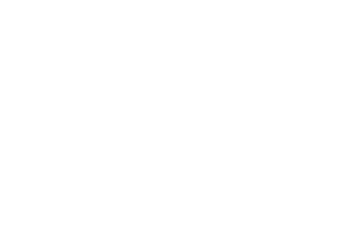

In [269]:
from sklearn import tree
X = [[0, 0], [1, 1], [2,0]] # [["red", "round"], ["yellow", "long"], ["orange", "round"]]
Y = [0, 1, 2]               # [    "apple",            "banana",            "orange"]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)




import graphviz 
tree.plot_tree(estimator)



#tree.plot_tree(clf.fit(iris.data, iris.target)) 


In [267]:
dot -Tpdf "tree.dot" -o tree.pdf

SyntaxError: invalid syntax (<ipython-input-267-2d6ead6ff3dd>, line 1)

# --------------------------------------------------------------

# Entropy (Fishing Example)
Each day you fish until you have caught 100 fish.  You need to telegraph to shore what you caught.

Typical day:
* Groundfish (98 in 100)
* Shark  (1 in 100)
* Tuna (1 in 100)

### Encoding 1:
| Value | Encoding |
| :------------- | :----: |
| 1 (Groundfish) | "00" |
| 2 (Shark) | "01" |
| 3 (Tuna) | "10" |

* Exactly 2 bits per fish.
* To transmit data for 100 fish would take 200 bits.

### Encoding 2:
| Value | Encoding |
| :------------- | :----: |
| 1 (Groundfish) | "0" |
| 2 (Shark) | "10" |
| 3 (Tuna) | "11" |

* The number of bits reflects the frequency of that data value.
* For 100 fish it would be ~101 bits.

### Encoding 3:
| Value | Encoding |
| :------------- | :----: |
| 1 (Groundfish) | "" |
| 2 (Shark) | "0" |
| 3 (Tuna) | "1" |

* For 100 fish it would be ~2 bits.

*There is a lot of homogeniety in the fish data.  Entropy is a measure of homogeniety.*

# Fishing Case 1

$$S=-\sum_{i=1}^{8} \ (3/24)  log_2( 3/24)$$

# Fishing Case 2

$$S=   (17/24)log_2(17/24) + \sum_{i=2}^{8} \ (1/24)  log_2( 1/24)$$



## Cross-Entropy?
Note there are two things:

* The distribution on which the encoding is based
* The distribution of the data to be encoded
    
What is co-variance ?

# ------------------------------------------------------------------